In [4]:
%matplotlib inline  
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

dfSales = pd.read_csv('vgSalesRating.csv')

In [5]:
dfSales = dfSales.drop(columns = ['Rating','Developer','Publisher'])


In [6]:

dfSales = dfSales.loc[(dfSales['Year_of_Release'] > 2010) & (dfSales['Global_Sales'] > 0.2) & (dfSales['Global_Sales'] < 15)]

In [7]:
dfSales.isnull().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       488
Critic_Count       488
User_Score         318
User_Count         377
dtype: int64

In [8]:
dfSales.shape

(1553, 13)

In [9]:
dfSales = dfSales.dropna()
# dfSales

In [23]:
sns.set(rc={'figure.figsize':(10,7)})
# sns.displot(dfSales['EU_Sales'], bins=100)
# plt.show()

In [11]:
correlation_matrix = dfSales.corr().round(2)
# print(correlation_matrix)
# annot = True to print the values inside the square
# sns.heatmap(data=correlation_matrix, annot=True)

In [12]:

# plt.figure(figsize=(20, 5))

# features = ['NA_Sales']
# target = dfSales['EU_Sales']

# for i, col in enumerate(features):
#     plt.subplot(1, len(features) , i+1)
#     x = dfSales[col]
#     y = target
#     plt.scatter(x, y, marker='o')
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('EU_Sales')

In [13]:
X = pd.DataFrame(np.c_[dfSales['NA_Sales'], dfSales['JP_Sales']], columns = ['NA_Sales','JP_Sales'])
y = dfSales['EU_Sales']

print(X.dtypes)
print(y.dtypes)

NA_Sales    float64
JP_Sales    float64
dtype: object
float64


In [14]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(948, 2)
(106, 2)
(948,)
(106,)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [16]:
from sklearn.metrics import r2_score
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
testPred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.5141598247213789
R2 score is 0.4859524310967287


The model performance for testing set
--------------------------------------
RMSE is 0.11989447554057847
R2 score is 0.6211347249865815


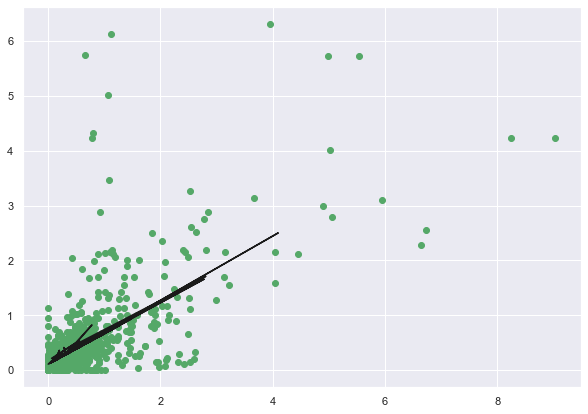

In [17]:
plt.scatter(X_train['NA_Sales'], Y_train,color='g') 
# plt.scatter(X_train['Global_Sales'], Y_train,color='b') 
plt.plot(X_test['NA_Sales'], y_test_predict,color='k') 



# plt.show()

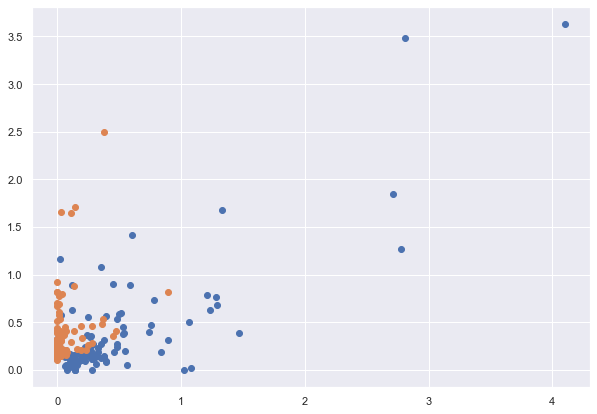

In [18]:
plt.scatter(X_test['NA_Sales'],Y_test)
plt.scatter(X_test['JP_Sales'],y_test_predict)
# plt.show()

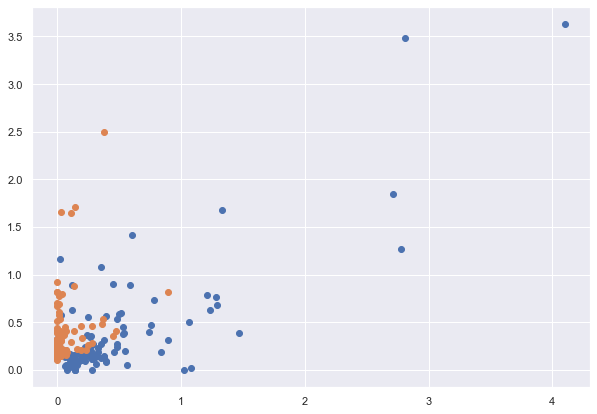

In [19]:
plt.scatter(X_test['NA_Sales'],Y_test)
plt.scatter(X_test['JP_Sales'],y_test_predict)
# plt.show()

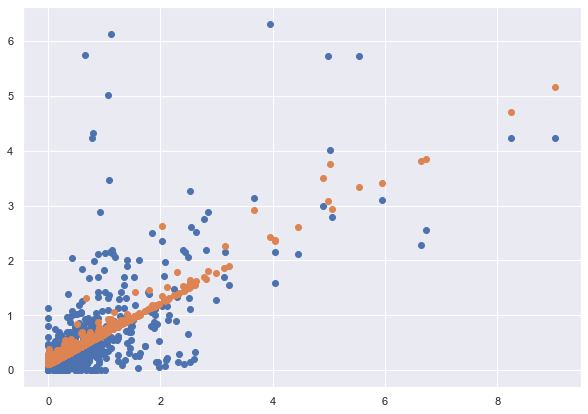

In [20]:
plt.scatter(X_train['NA_Sales'],Y_train)
plt.scatter(X_train['NA_Sales'],y_train_predict)
# plt.show()


In [21]:
# # Plotting a 3-D plot for visualizing the Multiple Linear Regression Model  
  
# # Preparing the data  
# independent = dfSales[['JP_Sales', 'NA_Sales']].values.reshape(-1,2)  
# dependent = dfSales['EU_Sales']  
  
# # Creating a variable for each dimension  
# x = independent[:, 0]  
# y = independent[:, 1]  
# z = dependent  
  
# x_range = np.linspace(5, 10, 35)    
# y_range = np.linspace(3, 6, 35)   
# x1_range = np.linspace(3, 6, 35)  
# x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
# viz = np.array([x_range.flatten(), y_range.flatten()]).T  
  
    
# # Predicting price values using the linear regression model built above  
# predictions = lin_model.predict(viz)  
    
# # Ploting the model for visualization  
# plt.style.use('fivethirtyeight')  
  
# # Initializing a matplotlib figure  
# fig = plt.figure(figsize = (15, 6))  
  
# axis1 = fig.add_subplot(131, projection = '3d')  
# axis2 = fig.add_subplot(132, projection = '3d')  
# axis3 = fig.add_subplot(133, projection = '3d')  
  
# axes = [axis1, axis2, axis3]  
  
# for ax in axes:  
#     ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
#     ax.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')  
#     ax.set_xlabel('JP_Sales', fontsize = 10, labelpad = 10)  
#     ax.set_ylabel('NA_Sales', fontsize = 10, labelpad = 10)  
#     ax.set_zlabel('EU_Sales', fontsize = 10, labelpad = 10)  
#     ax.locator_params(nbins = 3, axis = 'x')  
#     ax.locator_params(nbins = 3, axis = 'x')  
  
# axis1.view_init(elev=25, azim=-60)  
# axis2.view_init(elev=15, azim=15)  
# axis3.view_init(elev=25, azim=60)  
  
# fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k')